In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# 1. Analyzing CommonVoice

1. For each language, determine the total duration of recording and the number of different
speakers.

In [3]:
all_recordings = pd.concat([pd.read_csv(path, delimiter='\t') for path in Path("metadata").rglob("*.tsv") if path.stem in {"train", "dev", "test"}])

list(Path("metadata").rglob("clip_durations.tsv"))
all_durations = pd.concat([pd.read_csv(path, delimiter='\t') for path in Path("metadata").rglob("clip_durations.tsv")])

df_all = pd.merge(all_recordings, all_durations, left_on="path", right_on="clip", validate="1:1")

/tmp/ipykernel_14880/3788942107.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  all_recordings = pd.concat([pd.read_csv(path, delimiter='\t') for path in Path("metadata").rglob("*.tsv") if path.stem in {"train", "dev", "test"}])


In [4]:
df_all

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,variant,locale,segment,clip,duration[ms]
0,01cb8168e7f0310440e1266c4ac7fac523c6e074908fd0...,common_voice_tr_31400937.mp3,Bir şeyler yapmalıyız.,2,0,teens,male,NaN,NaN,tr,NaN,common_voice_tr_31400937.mp3,4824
1,026eeac891913f2364d3a89af31d5b50344d61ab7c0218...,common_voice_tr_23660893.mp3,Hayatta küçük şeyleri kovalıyor ve yine küçük ...,2,1,NaN,NaN,NaN,NaN,tr,NaN,common_voice_tr_23660893.mp3,8136
2,0c8ba63665303a01117332d5c7de7438ee9e9f5d523530...,common_voice_tr_17343923.mp3,Seydiu şimdi iki mevkiyi de kaybetti.,2,1,teens,male,NaN,NaN,tr,NaN,common_voice_tr_17343923.mp3,3096
3,113d3691dda566e70dfe0d290bb162b1804e482ac93d7e...,common_voice_tr_26078972.mp3,Ancak üç sezon sonra ligden ayrıldılar.,2,0,NaN,NaN,NaN,NaN,tr,NaN,common_voice_tr_26078972.mp3,2916
4,1618d653b0f0e471c5f376d9a487a8dc5089b484936941...,common_voice_tr_23388477.mp3,Katilin basitçe “Canavar” olarak bilinen büyük...,2,0,NaN,NaN,NaN,NaN,tr,NaN,common_voice_tr_23388477.mp3,6864
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250996,457b3a2570720101c75d297cde767487e8f0a1a7f714cb...,common_voice_sw_29322247.mp3,Inafanya maombi ya vitendo iwezekanavyo.,2,0,thirties,male,NaN,NaN,sw,NaN,common_voice_sw_29322247.mp3,3960
3250997,457b3a2570720101c75d297cde767487e8f0a1a7f714cb...,common_voice_sw_29322691.mp3,Alitunga kitabu kuhusu nuru yenye rangi ya nyo...,2,0,thirties,male,NaN,NaN,sw,NaN,common_voice_sw_29322691.mp3,4932
3250998,457b3a2570720101c75d297cde767487e8f0a1a7f714cb...,common_voice_sw_29323614.mp3,Aliwahi kucheza timu ya taifa ya Yugoslavia na...,2,0,thirties,male,NaN,NaN,sw,NaN,common_voice_sw_29323614.mp3,6696
3250999,457b3a2570720101c75d297cde767487e8f0a1a7f714cb...,common_voice_sw_29362712.mp3,Aliendelea na wajibu mbalimbali katika wizara ...,2,0,thirties,male,NaN,NaN,sw,NaN,common_voice_sw_29362712.mp3,4968


In [5]:
df_all.groupby(["locale"])["duration[ms]"].sum() / (1_000 * 60 * 60)

locale
ar         57.695501
de        955.612348
en       1742.550265
es        504.335568
fr        809.464376
id         15.678874
it        296.287886
ja         22.247067
lg        148.435285
ru         68.912129
sw        103.585020
ta        107.846113
tr         51.848903
zh-CN      75.680230
Name: duration[ms], dtype: float64

In [6]:
df_all.groupby(["locale"])["client_id"].nunique()

locale
ar        1042
de       15580
en       54507
es       14127
fr       15378
id         362
it        6688
ja        1426
lg         591
ru        2573
sw        1079
ta         498
tr        1396
zh-CN     4314
Name: client_id, dtype: int64

2. For each language and each genre determine the total duration of recordings, the number
of different speakers, the average, median, min and max number of recordings per speaker.

In [7]:
# total duration of recordings for each language and each gender
df_all.groupby(["locale", "gender"])["duration[ms]"].sum() / (1_000 * 60 * 60)


locale  gender
ar      female     12.715280
        male       14.031102
        other       0.041560
de      female     71.547012
        male      518.865081
        other       6.799979
en      female    337.347712
        male      827.141069
        other      36.626317
es      female    133.290066
        male      265.874197
        other       1.678353
fr      female     89.399447
        male      462.844942
        other       7.241967
id      female      4.194793
        male        6.586540
        other       0.057493
it      female     31.904288
        male      169.929121
        other       0.931947
ja      female      4.805273
        male       12.248093
        other       0.132473
lg      female     70.148545
        male       44.644843
ru      female     10.011498
        male       36.291173
        other       0.276693
sw      female     35.229920
        male       27.969680
        other       0.126720
ta      female     25.432930
        male       21.638663

In [8]:
# number of different speakers for each language and each gender
df_all.groupby(["locale", "gender"], dropna=False)["client_id"].nunique() #.plot(kind='bar')


locale  gender
ar      female      110
        male        330
        other         8
        NaN         695
de      female      622
        male       3497
        other        54
        NaN       11951
en      female     3342
        male      12203
        other       343
        NaN       40499
es      female     1260
        male       3269
        other        66
        NaN        9748
fr      female      857
        male       3474
        other        85
        NaN       11478
id      female       38
        male        138
        other         4
        NaN         202
it      female      374
        male       1583
        other        14
        NaN        4904
ja      female      280
        male        621
        other        15
        NaN         692
lg      female      211
        male        212
        NaN         285
ru      female      285
        male        882
        other         8
        NaN        1563
sw      female      270
        male        281
 

In [9]:
df_recordings_count = df_all.groupby(['locale', 'gender', 'client_id']).size().reset_index(name='recordings_count')
# average number of recordings per speaker for each language and gender
df_recordings_count.groupby(['locale', 'gender'])['recordings_count'].mean()
# median number of recordings per speaker for each language and gender
df_recordings_count.groupby(['locale', 'gender'])['recordings_count'].median()
# min number of recordings per speaker for each language and gender
df_recordings_count.groupby(['locale', 'gender'])['recordings_count'].min()
# max number of recordings per speaker for each language and gender
df_recordings_count.groupby(['locale', 'gender'])['recordings_count'].max()


locale  gender
ar      female     1286
        male       1174
        other        19
de      female     3068
        male      60854
        other      2731
en      female     9795
        male      47480
        other      8137
es      female    20353
        male      32827
        other       435
fr      female    10019
        male      33257
        other       933
id      female     1309
        male       1726
        other        20
it      female     1336
        male       6231
        other       334
ja      female     1147
        male       2758
        other        17
lg      female     2300
        male       3259
ru      female     1037
        male        956
        other        57
sw      female     1293
        male        818
        other        75
ta      female     2515
        male       4195
        other        47
tr      female     6786
        male       4894
        other       189
zh-CN   female     1284
        male        886
        other       227
N

3. Which language has the highest proportion of recordings by a person in the largest age
bracket considered ?

In [10]:
# determine the largest age bracket
print(df_all["age"].unique()) # -> nineties

df_all[df_all['age'] == 'nineties']\
          .groupby(['locale', 'client_id'])\
          .size()\
          .reset_index(name='recordings_count')\
          .assign(proportion=lambda x: x['recordings_count'] / x['recordings_count'].sum())\
          .sort_values(by='proportion', ascending=False)\
          .head(1)


['teens' nan 'twenties' 'fifties' 'thirties' 'fourties' 'eighties'
 'sixties' 'seventies' 'nineties']


,locale,client_id,recordings_count,proportion
14,lg,cb684886da071f9271fa154a6228cb11474bdceab3ecdf...,352,0.539877


4. Determine the number of different genres considered in the corpus. What is the percentage of recordings for which no genre information is available ?
 Plot the genre distribution (including cases where gender information is not available). Do the same for ages.

number of different genders considered in the corpus:  3
percentage of recordings for which no genre information is available:  0.3146390911599227


<Axes: xlabel='gender'>

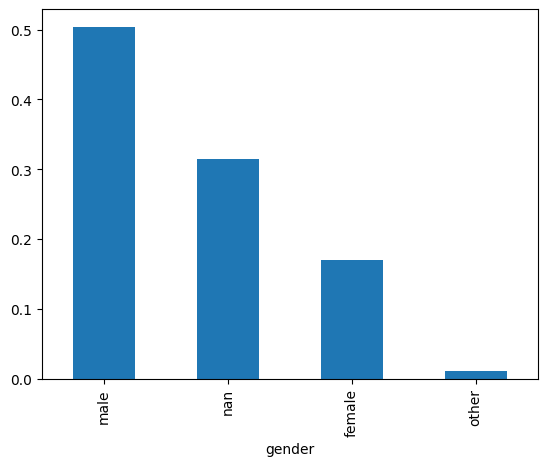

In [11]:
print("number of different genders considered in the corpus: ",df_all["gender"].nunique())

print("percentage of recordings for which no genre information is available: ", df_all["gender"].value_counts(dropna=False, normalize=True).get(np.nan))

# plot of gender distribution
df_all["gender"].value_counts(dropna=False, normalize=True).plot(kind='bar')

number of different age brackets considered in the corpus:  9
percentage of recordings for which no age information is available:  0.32924813003748693


<Axes: xlabel='age'>

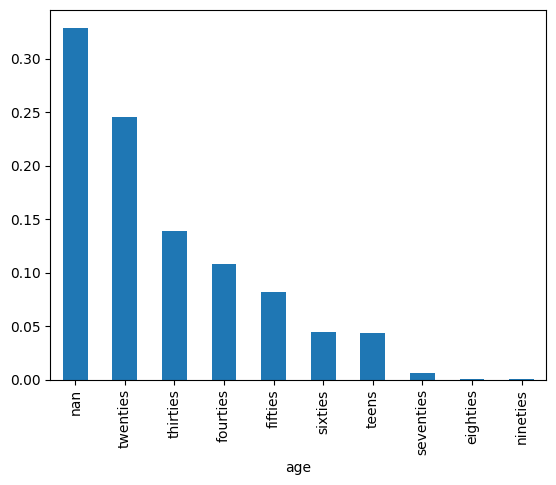

In [12]:
print("number of different age brackets considered in the corpus: ",df_all["age"].nunique())

print("percentage of recordings for which no age information is available: ", df_all["age"].value_counts(dropna=False, normalize=True).get(np.nan))

# plot of age distribution
df_all["age"].value_counts(dropna=False, normalize=True).plot(kind='bar')

5. Find out for each language and each genre the 7 speakers who produced the most recordings.

In [13]:
for language in df_all["locale"].unique():
    for gender in df_all["gender"].unique():
        print(language, gender, df_all[(df_all["locale"] == (language)) & (df_all["gender"] == (gender))].groupby(['client_id'])["clip"].count().sort_values(ascending=False).head(7))

tr male client_id
ca179eb54e4e584d30587ba3c6c1d4de7d9082d649113d481d308f3e7d858e0a1df21d9591f9c613928b1e122aa7f54535d0f0e0c1380d87d8017844e6e73ea2    4894
b0ec03dc36c7ef4ef29409671a91c488e78765d3a17d32b778c7e4425c32026f9341a6e73f11cda3c0cd7ed97f4e5dc3ec6b8b099098c9ddfb21345a0c39eb07    3342
60cee2235d7ec4cdeb89d601b8c373955b303c712ec729ed0affdabda8819908f51cefa990163d2bc4ac04c93e6dac2909cca67829211df4a2a17af2507dd50a    2246
c3c204ffaebfc46c0265773376f9288a372694aa79f97afe224828033c28d6d2a90919aaf769bf14105cb4033650e10275760afe250490782eae15c1d1518799    1843
137102afdef7dc128fc101a2c19623d189087e7e3cf388c08fa5298349682fc8e9b7130a4ae2f4d8fdf8eaa584afd95f9b1df35dff651ad53c479703f3d83ecf     872
e4d14fc9d2534ce687620d788ca13c41014918ec07adef00cd496f25220a3192516bbeb660ca34f88fd9f35f4e5015e869992b6111e2a20bd967b6a11ae9d950     576
f13884720b9d351e1bfba108d3f79ff67ad46c731532139db576631dde26a9e79807f94ac8917554bed2c1d1be31817435a88f842bde9dd692a70a7276dc7c1a     547
Name: clip, dtype: int6

6. For each language, create a 1-hour test set and a training set as large as possible, ensuring
that speakers from the test set do not appear in the training set.

In [14]:
train_test_sets = {}
for language in df_all["locale"].unique():
    df_by_language = df_all[(df_all["locale"] == language)]
    cumulated_duration_by_speaker = (df_by_language.groupby(["client_id"])["duration[ms]"].sum()).to_frame()
    cumulated_duration_by_speaker["cumulated_time"] = cumulated_duration_by_speaker["duration[ms]"].cumsum()
    cumulated_duration_by_speaker = cumulated_duration_by_speaker[cumulated_duration_by_speaker["cumulated_time"] < 3_600_000]
    merged = pd.merge(df_by_language, cumulated_duration_by_speaker, on='client_id', how='left', indicator=True)
    train_set = merged[merged['_merge'] == 'left_only'].drop('_merge', axis=1)
    test_set = merged[merged['_merge'] == 'both'].drop('_merge', axis=1)
    train_test_sets[language] = {'test set': test_set, 'train set': train_set}


train_test_sets['en']['test set']

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,variant,locale,segment,clip,duration[ms]_x,duration[ms]_y,cumulated_time
0,000abb3006b78ea4c1144e55d9d158f05a9db011016051...,common_voice_en_27710027.mp3,"Joe Keaton disapproved of films, and Buster al...",3,1,NaN,NaN,NaN,NaN,en,NaN,common_voice_en_27710027.mp3,6300,6300.0,179016.0
1,0013037a1d45cc33460806cc3f8ecee9d536c45639ba4c...,common_voice_en_699711.mp3,She'll be all right.,2,1,NaN,NaN,NaN,NaN,en,NaN,common_voice_en_699711.mp3,2184,2184.0,309324.0
2,0014c5a3e5715a54855257779b89c2bb498d470b225866...,common_voice_en_21953345.mp3,six,3,2,NaN,NaN,NaN,NaN,en,Benchmark,common_voice_en_21953345.mp3,6576,6576.0,507900.0
3,001509f4624a7dee75247f6a8b642c4a0d09f8be3eeea6...,common_voice_en_18132047.mp3,All's well that ends well.,2,0,NaN,NaN,NaN,NaN,en,NaN,common_voice_en_18132047.mp3,4176,4176.0,512076.0
4,001519f234e04528a2b36158c205dbe61c8da45ab0242f...,common_voice_en_27340672.mp3,It is a busy market town that serves a large s...,2,0,NaN,NaN,NaN,NaN,en,NaN,common_voice_en_27340672.mp3,6660,6660.0,518736.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210312,00143475c51f0cc41c344019a368e509aa933b8767de7e...,common_voice_en_23706526.mp3,"The verb inflection ""-haru"" is an essential pa...",2,0,twenties,male,Canadian English,NaN,en,NaN,common_voice_en_23706526.mp3,6672,105672.0,448308.0
210313,00143475c51f0cc41c344019a368e509aa933b8767de7e...,common_voice_en_23706527.mp3,The town may have come into conflict with the ...,2,0,twenties,male,Canadian English,NaN,en,NaN,common_voice_en_23706527.mp3,6072,105672.0,448308.0
210314,00143475c51f0cc41c344019a368e509aa933b8767de7e...,common_voice_en_23706529.mp3,The Governor chairs the Board.,2,1,twenties,male,Canadian English,NaN,en,NaN,common_voice_en_23706529.mp3,3288,105672.0,448308.0
210315,00143475c51f0cc41c344019a368e509aa933b8767de7e...,common_voice_en_23706530.mp3,Nutan was crowned as Miss Mussorie.,2,0,twenties,male,Canadian English,NaN,en,NaN,common_voice_en_23706530.mp3,3888,105672.0,448308.0


7. How many languages have more female than male recordings ?

In [15]:
gender_counts = df_all.groupby(['locale', 'gender'])['client_id'].count().unstack(fill_value=0)
languages_with_more_females = gender_counts[gender_counts['female'] > gender_counts['male']]

print("Number of languages with more female than male recordings:", len(languages_with_more_females))

Number of languages with more female than male recordings: 3


8. Which language has the most unbalanced gender distribution ?

In [16]:
print("language with most unbalanced gender distribution:", abs(gender_counts["male"] - gender_counts["female"]).idxmax())

language with most unbalanced gender distribution: en


9. For each language, create a train set containing 1 hour of recordings and a 10-minute test
set so that : i) train and test are gender-balanced ii) the train and test speakers are different

In [17]:
# train_test_sets = {}
# for language in df_all["locale"].unique():
#     df_by_language = df_all[(df_all["locale"] == language)]
#     cumulated_duration_by_speaker = (df_by_language.groupby(["client_id"])["duration[ms]"].sum()).to_frame()
#     cumulated_duration_by_speaker["cumulated_time"] = cumulated_duration_by_speaker["duration[ms]"].cumsum()
#     cumulated_duration_by_speaker = cumulated_duration_by_speaker[cumulated_duration_by_speaker["cumulated_time"] < 3_600_000]
#     merged = pd.merge(df_by_language, cumulated_duration_by_speaker, on='client_id', how='left', indicator=True)
#     train_set = merged[merged['_merge'] == 'left_only'].drop('_merge', axis=1)
#     test_set = merged[merged['_merge'] == 'both'].drop('_merge', axis=1)
#     train_test_sets[language] = {'test set': test_set, 'train set': train_set}


# train_test_sets['en']['test set']

10. Plot, for each language, a box plot representing the distribution of the number of words
per sentence. (use tokenizer from Moses or Polyglot.)

In [18]:
# from mosestokenizer import *

In [19]:
# import polyglot
# from polyglot.text import Text

In [20]:
import pandas as pd

In [21]:
subdf = df_all.sample(frac=0.1)

In [22]:
import polyglot
from polyglot.text import Text, Word
from polyglot.detect.base import logger as polyglot_logger
polyglot_logger.setLevel("ERROR")
# try:
#     df_all = pd.read_csv('df_all.csv', sep='\t')
# except FileNotFoundError:

#tokenizer_lang = {language: MosesTokenizer(language) for language in df_all["locale"].unique()}
subdf["sentence"] = subdf["sentence"].apply(lambda x: Text(str(x).lower().replace('\n', '')).words)
#df_all.to_csv('df_all.csv', sep='\t')

In [ ]:
# tokenized_words = []
# nb_words_in_sentence = []
# for language in df_all["locale"].unique():
#     #df_by_language = df_all[(df_all["locale"] == language)]
#     with MosesTokenizer(language) as tokenize:
#         #df_by_language["nb_words_in_sentence"] = [len(tokenize(str(sentence).replace('\n', ''))) for sentence in df_by_language["sentence"]]
#         # tokenized = [tokenize(str(sentence).replace('\n', '')) for sentence in df_all[df_all['locale'] == language]["sentence"]]
#         # tokenized_words.append([word for sublist in tokenized for word in sublist if word not in stop_words[language]])
#         #df_all[(df_all["locale"] == language)]["sentence"].apply(lambda x: tokenize(str(x).replace('\n', '')))
        
#         df_all.loc[df_all['locale'] == language, 'sentence'] = df_all[(df_all["locale"] == language)]["sentence"].apply(lambda x: tokenize(str(x).lower().replace('\n', '')))
#         #nb_words_in_sentence.append([len(tokenize(str(sentence).replace('\n', ''))) for sentence in df_all[(df_all["locale"] == language)]["sentence"]])  # len(sentence) for sentence in tokenized
#         #pd.merge(df_all, df_by_language, on="client_id")

In [ ]:
df_all

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,variant,locale,segment,clip,duration[ms],nb_words_in_sentence
2724362,b74ab1c0d457168bab7f97306989829f30cd8f4774df2e...,common_voice_en_19132453.mp3,"[edward's, determination, had, the, desired, e...",2,0,thirties,male,Australian English,NaN,en,NaN,common_voice_en_19132453.mp3,5280,7
1748403,853d72391fef60049ee139a1e170b719bd0d9b8d4d13eb...,common_voice_de_32139011.mp3,"[zu, nahrung, und, brutzeit, liegen, keine, an...",2,0,NaN,NaN,Deutschland Deutsch,NaN,de,NaN,common_voice_de_32139011.mp3,5004,9
1885510,0405b008f75ec1d4c57239af8acdd27f00302dfc88da1a...,common_voice_ar_24089178.mp3,"[هل, ذكر, أحد, إسمي, ؟]",2,1,NaN,NaN,NaN,NaN,ar,NaN,common_voice_ar_24089178.mp3,3168,5
635920,b169f29ea4179ed2734939e6009e537862efc68976955c...,common_voice_zh-CN_21273642.mp3,"[葛, 福, 临, 在, 北卡罗来纳, 州, 阿, 什, 维, 尔, 市外, 的, 阿, 巴...",2,1,twenties,male,出生地：32 江苏省,NaN,zh-CN,NaN,common_voice_zh-CN_21273642.mp3,6336,19
179578,d643452758edcdf508ce156efb10e9b67be5152d3f083b...,common_voice_es_22763446.mp3,"[finalmente, rama, la, rescató, en, la, famosa...",2,1,fifties,female,"Rioplatense: Argentina, Uruguay, este de Boliv...",NaN,es,NaN,common_voice_es_22763446.mp3,7920,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413426,0f7246bdbc52c381af085a851c78914fdedc7dc9805450...,common_voice_it_20089347.mp3,"[estratto, :, il, padre, nostro]",2,0,NaN,NaN,NaN,NaN,it,NaN,common_voice_it_20089347.mp3,4416,5
609220,cfaae71bab1d153eb322c121422ef87864e697ea041238...,common_voice_zh-CN_27442914.mp3,"[网, 状, 马, 勃, 为, 马, 勃, 属, 。]",6,0,NaN,NaN,NaN,NaN,zh-CN,NaN,common_voice_zh-CN_27442914.mp3,3708,9
1384345,8f98afa1499d6983f487bc7cc9d01c2e96ea1f68fc5127...,common_voice_de_36865278.mp3,"[im, zuge, der, vorbereitung, auf, dieses, gip...",2,0,NaN,NaN,NaN,NaN,de,NaN,common_voice_de_36865278.mp3,7236,12
2151425,41f265318112cf7edfb0b9fbe77ecb999ba79a462f759f...,common_voice_en_19751781.mp3,"[the, doorbell, button, contains, a, built, -,...",2,1,NaN,NaN,NaN,NaN,en,NaN,common_voice_en_19751781.mp3,9408,15


In [23]:
subdf["nb_words_in_sentence"] = subdf["sentence"].apply(lambda x: len(x))
#subdf["nb_words_in_sentence"] = subdf["sentence"].apply(lambda x: len(x))

In [24]:
subdf["nb_words_in_sentence"].value_counts()

nb_words_in_sentence
12      31694
13      31366
14      31349
11      31242
15      30213
        ...  
1421        1
768         1
4488        1
43          1
904         1
Name: count, Length: 62, dtype: int64

In [25]:
subdf[subdf["nb_words_in_sentence"] > 50000]  # problem with file for language 'ta'

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,variant,locale,segment,clip,duration[ms],nb_words_in_sentence


nb_words_in_sentence    Axes(0.125,0.11;0.775x0.77)
dtype: object

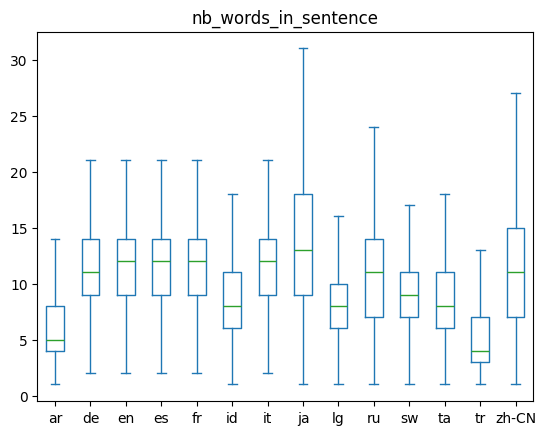

In [26]:
subdf.plot(kind='box', column=["nb_words_in_sentence"], by="locale", showfliers=False)
#df_all.groupby('locale')['nb_words_in_sentence'].plot(kind='box')
#df_all.loc['locale', 'nb_words_in_sentence'].plot(kind='box')

We notice 2 anormal plots: for 'ta', some sentences are abnormally long. When looking at the file, some sentences indeed contain other data (with up to 60000 words for 1 sentence)
For chinese, MosesTokenizer seems to consider sentences as one single word as long as there are no spaces

11. For each language, find the 17 most frequent words after having removed stop words.

In [28]:
# %pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 773.9/773.9 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 27.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [29]:
from nltk.corpus import stopwords
stop_words = {'en': stopwords.words('english'), 'ar': stopwords.words('arabic'), 'de': stopwords.words('german'), 'es': stopwords.words('spanish'), 'fr': stopwords.words('french'), 'id': stopwords.words('indonesian'), 'it': stopwords.words('italian'), 'ja': [], 'lg': [], 'ru': stopwords.words('russian'), 'sw': stopwords.words('swedish'), 'ta': stopwords.words('tajik'), 'tr': stopwords.words('turkish'), 'zh-CN': stopwords.words('chinese')}

In [30]:
punctuation = ['.', ',', '?', '!', ':', ';', '。', '؟', "'", '"', '、', '@-@', '&quot', '&apos;s', "&apos", '-', '...', '&quot;', 'l&apos', '’', '，', '…', '—', '・', '？', '：', '·', '；', '،', '–', '_', '「', '」', '『', '』', '“', '„', 'l&apos;', 'd&apos;', 'dell&apos;', '&apos;', '《', '》']

In [31]:
subdf['sentence'] = subdf.apply(lambda x: [word for word in x["sentence"] if word not in stop_words[x["locale"]] and word not in punctuation], axis=1)

In [32]:
from collections import Counter
word_counts = subdf.groupby('locale')['sentence'].sum().apply(Counter).apply(lambda x: x.most_common(17))
#word_counts = subdf.groupby('locale')['sentence'].sum().apply(pd.Series).stack().value_counts()

In [33]:
word_counts

locale
ar       [(سامي, 190), (مِنْ, 175), (فِي, 157), (الله, ...
de       [(wurde, 3854), (wurden, 1295), (zwei, 1030), ...
en       [(also, 6894), (two, 3154), (one, 2978), (firs...
es       [(dos, 939), (encuentra, 606), (parte, 556), (...
fr       [(a, 3703), (cette, 2435), (plus, 2226), (deux...
id       [(tom, 43), (pergi, 33), (orang, 32), (memilik...
it       [(due, 696), (stato, 481), (dopo, 453), (parte...
ja       [(の, 1025), (は, 874), (に, 656), (を, 600), (が, ...
lg       [(mu, 2841), (ku, 1775), (nga, 1191), (lg, 800...
ru       [(это, 362), (также, 117), (должны, 89), (нам,...
sw       [(ya, 3076), (na, 2924), (wa, 2065), (kwa, 109...
ta       [(என்று, 540), (ஒரு, 524), (ta, 278), (mp3, 27...
tr       [(bir, 749), (ben, 170), (var, 129), (mi, 117)...
zh-CN    [(一个, 537), (科, 315), (县, 286), (尔, 251), (州, ...
Name: sentence, dtype: object

12. Compute, for each language, the size of the available data both in term of duration and in
terms of number of words.

In [ ]:
subdf.groupby('locale').agg({'duration[ms]': 'sum', 'nb_words_in_sentence': 'sum'}).reset_index()\
    .rename(columns={'duration[ms]': 'total_duration_ms', 'nb_words_in_sentence': 'total_words'})